<div style=" background-color: RGB(0,100,100);" >

<h1 style="margin: auto; padding: 20px 0; color:#fff; text-align: center">MACHINE LEARNING</h1>

<h2 style="margin: auto; padding: 20px 0; color:#fff; text-align: center">Détection automatique de faux billets

</h2>

</div>

<div style="background-color: RGB(0,150,150);" >

<h2 style="margin: auto; padding: 20px; color:#fff; ">Etape 1 - Analyse Exploratoire</h2>

</div>

In [1]:
# importer les librairies
import pandas as pd
import numpy as np
import seaborn as sns

In [2]:
# Chargement du dataset et affichage des premières lignes
df = pd.read_csv("billets.csv", sep = ';')
df.head()

,is_genuine,diagonal,height_left,height_right,margin_low,margin_up,length
0,True,171.81,104.86,104.95,4.52,2.89,112.83
1,True,171.46,103.36,103.66,3.77,2.99,113.09
2,True,172.69,104.48,103.50,4.40,2.94,113.16
3,True,171.36,103.91,103.94,3.62,3.01,113.51
4,True,171.73,104.28,103.46,4.04,3.48,112.54


In [3]:
# Analyse statistique
df.describe().T

,count,mean,std,min,25%,50%,75%,max
diagonal,1500.0,171.958440,0.305195,171.04,171.750,171.96,172.17,173.01
height_left,1500.0,104.029533,0.299462,103.14,103.820,104.04,104.23,104.88
height_right,1500.0,103.920307,0.325627,102.82,103.710,103.92,104.15,104.95
margin_low,1463.0,4.485967,0.663813,2.98,4.015,4.31,4.87,6.90
margin_up,1500.0,3.151473,0.231813,2.27,2.990,3.14,3.31,3.91
length,1500.0,112.678500,0.872730,109.49,112.030,112.96,113.34,114.44


In [4]:
# Nature de chaque variable
df.dtypes

is_genuine         bool
diagonal        float64
height_left     float64
height_right    float64
margin_low      float64
margin_up       float64
length          float64
dtype: object

<div style="background-color: RGB(0,150,150);" >

<h2 style="margin: auto; padding: 20px; color:#fff; ">Etape 2 - Nettoyage et préparation des données</h2>

</div>

In [5]:
# Afficher le nom des colonnes
df.columns

Index(['is_genuine', 'diagonal', 'height_left', 'height_right', 'margin_low',
       'margin_up', 'length'],
      dtype='object')

In [6]:
# Identification des valeurs nulles(NAN)
pd.isnull(df).sum()

is_genuine       0
diagonal         0
height_left      0
height_right     0
margin_low      37
margin_up        0
length           0
dtype: int64

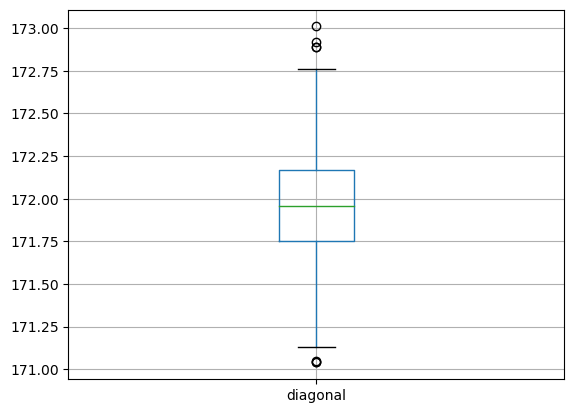

In [7]:
# déterminons si diagonal a des outlieres ou pas
import matplotlib.pyplot as plt
df.boxplot(column = 'diagonal')
plt.show()

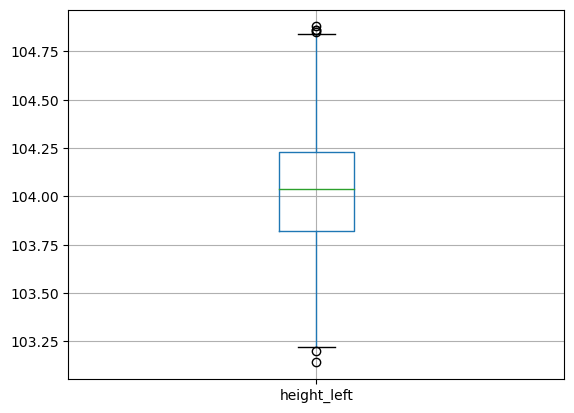

In [8]:
# déterminons si height_left a des outlieres ou pas
import matplotlib.pyplot as plt
df.boxplot(column = 'height_left')
plt.show()

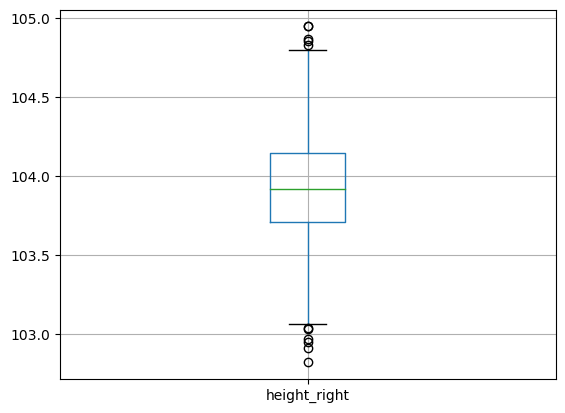

In [9]:
# déterminons si height_right a des outlieres ou pas
import matplotlib.pyplot as plt
df.boxplot(column = 'height_right')
plt.show()

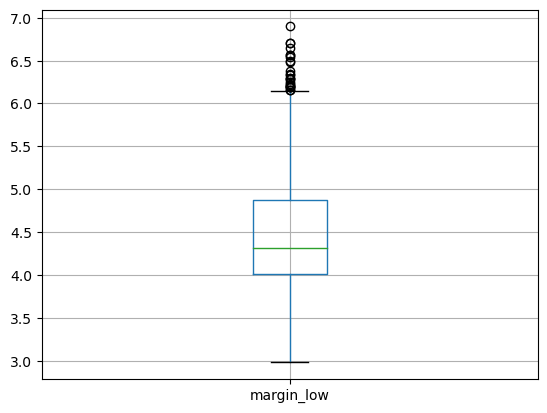

In [10]:
# déterminons si margin_low a des outlieres ou pas
import matplotlib.pyplot as plt
df.boxplot(column = 'margin_low')
plt.show()

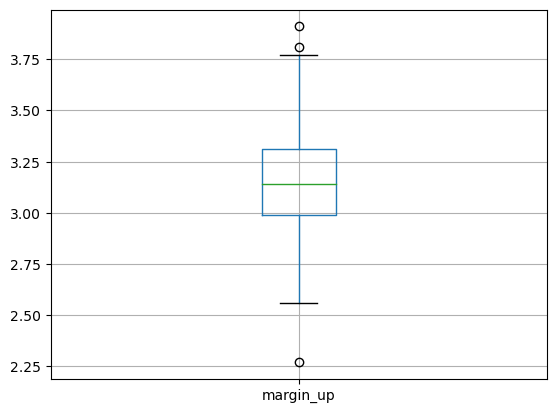

In [11]:
# déterminons si margin_up a des outlieres ou pas
import matplotlib.pyplot as plt
df.boxplot(column = 'margin_up')
plt.show()

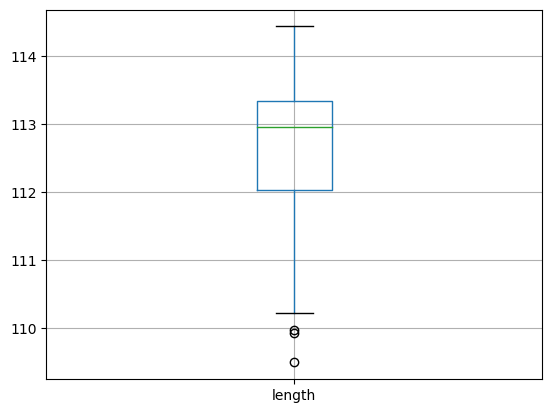

In [12]:
# déterminons si length a des outlieres ou pas
import matplotlib.pyplot as plt
df.boxplot(column = 'length')
plt.show()

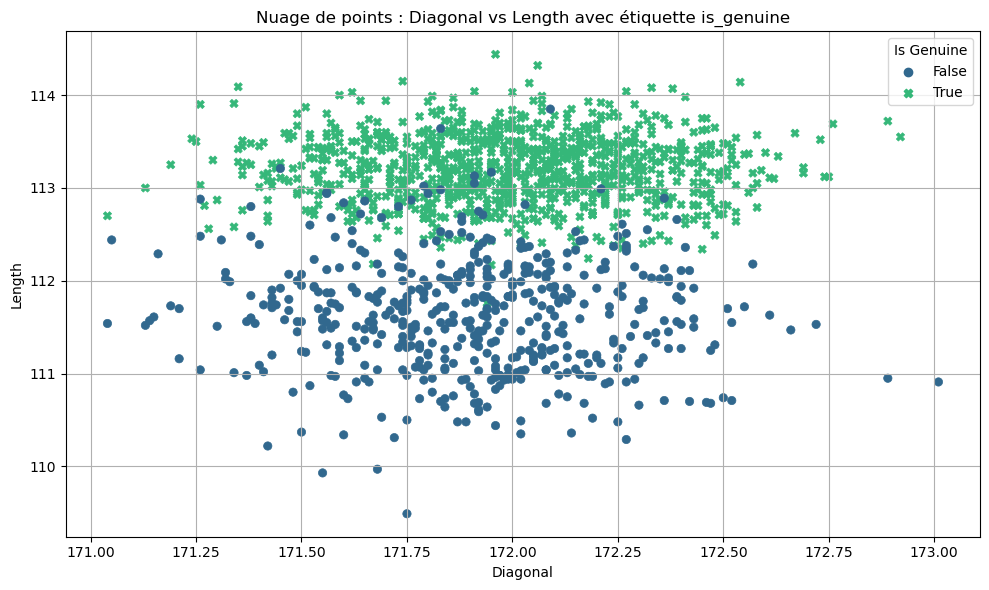

In [13]:
# Faire un nuage de points
plt.figure(figsize=(10, 6))
sns.scatterplot(
    data=df,
    x='diagonal',
    y='length',
    hue='is_genuine',
    palette='viridis',
    style='is_genuine',
    edgecolor=None
)
plt.title('Nuage de points : Diagonal vs Length avec étiquette is_genuine')
plt.xlabel('Diagonal')
plt.ylabel('Length')
plt.legend(title='Is Genuine')
plt.grid(True)
plt.tight_layout()
plt.show()

In [14]:
# Remplacer les valeurs nulles par la mediane
df['margin_low'].fillna(df['margin_low'].median(), inplace = True)

In [15]:
# Identification des valeurs nulles(NAN)
pd.isnull(df).sum()

is_genuine      0
diagonal        0
height_left     0
height_right    0
margin_low      0
margin_up       0
length          0
dtype: int64

In [17]:
from sklearn.preprocessing import LabelEncoder

# 1. Instancier l'encodeur
le = LabelEncoder()

# 2. Encoder la colonne 'Target'
df['is_genuine'] = le.fit_transform(df['is_genuine'])

# 3. Afficher le mapping entre texte et entiers
print(dict(zip(le.classes_, le.transform(le.classes_))))

{False: 0, True: 1}


<div style="background-color: RGB(0,150,150);" >

<h2 style="margin: auto; padding: 20px; color:#fff; ">Etape 3 - Visualisations</h2>

</div>

In [18]:
df["is_genuine"].value_counts()

1    1000
0     500
Name: is_genuine, dtype: int64

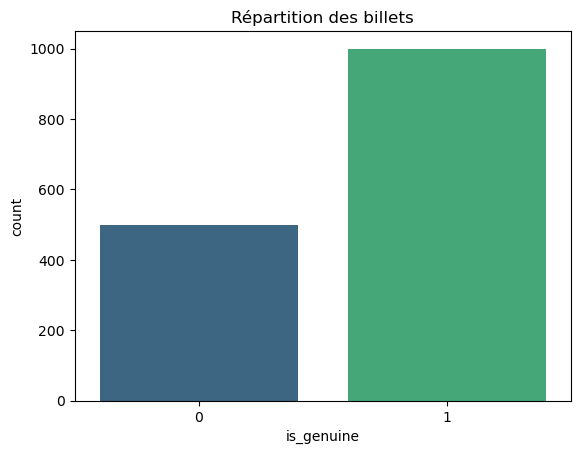

In [19]:
# nous allons réaliser une analyse univariée de la variable cible
sns.countplot(x='is_genuine', data=df, palette = 'viridis')
plt.title('Répartition des billets')
plt.show()

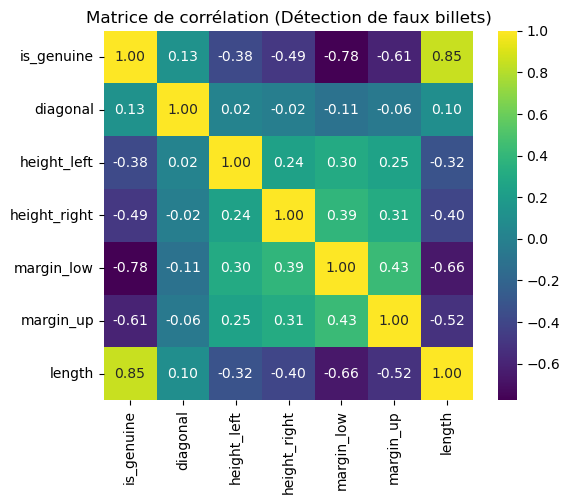

In [20]:
# Matrice de corrélation
numerical_df = df.select_dtypes(include=['int64', 'float64', 'bool'])
correlation_matrix = numerical_df.corr()

sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap='viridis', square=True)
plt.title("Matrice de corrélation (Détection de faux billets)")
plt.show()

<div style="background-color: RGB(0,150,150);" >

<h2 style="margin: auto; padding: 20px; color:#fff; ">Etape 4 - Modélisations</h2>

</div>

In [21]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.cluster import KMeans
from scipy.stats import mode
from scipy.optimize import linear_sum_assignment
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score, roc_curve, accuracy_score

In [22]:
# Sélectionner les variables indépendantes et la variable dépendante
X = df.drop(columns= ['is_genuine'])
y = df['is_genuine']

In [23]:
# Séparation du df en deux parties
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)
print(X_train.shape)
print(X_test.shape)

(1200, 6)
(300, 6)


In [24]:
# Normalisation
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

<div style="background-color: RGB(0,150,150);" >
  <h2 style="margin: auto; padding: 10px; color:#fff; font-size:15px;">
    Modèle REGRESSION LOGISTIQUE
  </h2>
</div>

In [34]:
# Créer le modèle
logmodel = LogisticRegression(solver='saga', max_iter=1000)

In [35]:
# Réaliser l'entraînement du modèle
logmodel.fit(X_train, y_train)
y_pred = logmodel.predict(X_test)

C:\Users\DELL 5330\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


In [36]:
# Calculer l'accuracy du modèle
accuracy = accuracy_score(y_test, y_pred)
print("Précision du modèle :", accuracy)
accuracy_2dec = round(accuracy, 2)
accuracy_2dec

Précision du modèle : 0.9766666666666667


0.98

In [37]:
# Calculer la probabilité
y_pred_prob = logmodel.predict_proba(X_test_scaled)[:, 1]
print(y_pred_prob)

[9.81172190e-01 2.03190803e-04 3.71736789e-04 3.37681925e-01
 8.02514272e-01 9.70380080e-01 8.80916847e-01 9.90779968e-01
 9.79799671e-01 7.08459658e-01 8.72072841e-04 9.86461965e-01
 4.48495981e-03 3.62957948e-04 8.14271201e-01 7.78127652e-04
 7.69636508e-01 7.62197071e-01 9.73514957e-01 8.40581588e-01
 1.03362345e-01 5.22876397e-05 4.45045955e-04 9.88781833e-01
 1.85618347e-01 9.98721706e-01 9.84580399e-01 1.43725451e-03
 9.99692023e-01 9.49274154e-03 7.37012587e-03 9.89269114e-01
 9.42083008e-01 9.92708714e-01 4.78104719e-04 9.95563119e-01
 9.47355419e-01 8.18802305e-01 9.99093614e-01 7.14847848e-02
 9.99441618e-01 9.81552680e-01 8.61515343e-01 3.18610249e-03
 9.96006883e-01 9.84589540e-01 9.45299360e-01 3.65235358e-01
 6.00955757e-04 8.68686654e-01 8.99734554e-01 5.68310804e-03
 8.74523360e-01 9.75747924e-01 9.22266588e-01 1.84757783e-01
 2.06311346e-02 7.76537272e-03 3.25762200e-03 2.26252583e-02
 1.24668547e-04 9.82670970e-01 8.73472879e-01 4.66453524e-01
 9.64569184e-01 5.601851

C:\Users\DELL 5330\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


In [38]:
# Matrice de confusion
y_pred = logmodel.predict(X_test)

cm = confusion_matrix(y_test, y_pred)
print("Matrice de confusion :\n", cm)

Matrice de confusion :
 [[ 94   6]
 [  1 199]]


In [39]:
# Classification Report
y_pred = logmodel.predict(X_test)

report = classification_report(y_test, y_pred, target_names=["faux billet", "Billet normal"])
print(report)

               precision    recall  f1-score   support

  faux billet       0.99      0.94      0.96       100
Billet normal       0.97      0.99      0.98       200

     accuracy                           0.98       300
    macro avg       0.98      0.97      0.97       300
 weighted avg       0.98      0.98      0.98       300



In [40]:
# Vérification des prédictions
results_df = pd.DataFrame({
    'is_genuine': y_test,
    'Predicted': y_pred,
    'Probabilite' : y_pred_prob
})
final = results_df[['is_genuine', 'Predicted', 'Probabilite']]
final.head()

,is_genuine,Predicted,Probabilite
803,1,1,0.981172
1306,0,0,0.000203
1263,0,0,0.000372
38,1,1,0.337682
257,1,1,0.802514


<div style="background-color: RGB(0,150,150);" >
  <h2 style="margin: auto; padding: 10px; color:#fff; font-size:15px;">
    Modèle K-MEANS
  </h2>
</div>

In [41]:
# Créer le modèle
kmeans = KMeans(n_clusters=2, random_state=42)

In [42]:
# Réaliser l'entraînement du modèle
kmeans.fit(X_train)
y_pred = kmeans.predict(X_test)

In [43]:
# Calculer l'accuracy du modèle
labels = np.zeros_like(y_pred)
for i in range(kmeans.n_clusters):
    mask = (y_pred == i)
    labels[mask] = mode(y_test[mask], keepdims=True).mode[0]

# Maintenant on peut calculer l'accuracy
accuracy = accuracy_score(y_test, labels)
print("Précision du modèle KMeans :", accuracy)

# Arrondi à 2 décimales
accuracy_2dec = round(accuracy, 2)
print("Accuracy arrondie :", accuracy_2dec)

Précision du modèle KMeans : 0.9733333333333334
Accuracy arrondie : 0.97


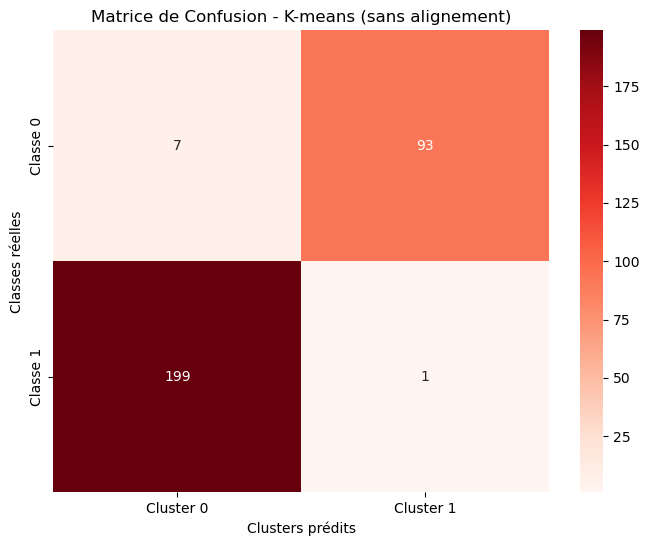

Matrice de confusion (sans alignement) :
[[  7  93]
 [199   1]]


In [44]:
# Matrice de confusion
cm = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Reds',
            xticklabels=['Cluster 0', 'Cluster 1'],
            yticklabels=['Classe 0', 'Classe 1'])
plt.xlabel('Clusters prédits')
plt.ylabel('Classes réelles')
plt.title('Matrice de Confusion - K-means (sans alignement)')
plt.show()

print("Matrice de confusion (sans alignement) :")
print(cm)

In [45]:
# Alignement des clusters avec les vraies classes
def align_kmeans_labels(y_true, y_pred):
    """
    Aligne les labels K-means avec les vraies classes
    """
    cm = confusion_matrix(y_true, y_pred)
    row_ind, col_ind = linear_sum_assignment(-cm)
    
    mapping = dict(zip(col_ind, row_ind))
    y_pred_aligned = np.array([mapping[x] for x in y_pred])
    
    return y_pred_aligned

# Aligner les labels avant de calculer le classification report
y_pred_aligned = align_kmeans_labels(y_test, y_pred)

# Classification Report dans le même format que la régression logistique
report = classification_report(y_test, y_pred_aligned, 
                              target_names=["faux billet", "Billet normal"])
print("CLASSIFICATION REPORT - K-MEANS")
print("="*40)
print(report)

CLASSIFICATION REPORT - K-MEANS
               precision    recall  f1-score   support

  faux billet       0.99      0.93      0.96       100
Billet normal       0.97      0.99      0.98       200

     accuracy                           0.97       300
    macro avg       0.98      0.96      0.97       300
 weighted avg       0.97      0.97      0.97       300



In [46]:
# Vérification des prédictions
results_df = pd.DataFrame({
    'is_genuine': y_test,
    'Predicted': y_pred
})
final = results_df[['is_genuine', 'Predicted']]
final.head()

,is_genuine,Predicted
803,1,0
1306,0,1
1263,0,1
38,1,0
257,1,0


<div style="background-color: RGB(0,150,150);" >
  <h2 style="margin: auto; padding: 10px; color:#fff; font-size:15px;">
    Modèle KNN
  </h2>
</div>

In [47]:
# Créer le modèle KNN
knn = KNeighborsClassifier(n_neighbors=5)

In [48]:
# Réaliser l'entraînement du modèle
knn.fit(X_train, y_train)
y_pred_knn = knn.predict(X_test)

C:\Users\DELL 5330\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


In [49]:
# Calculer l'accuracy du modèle
accuracy_knn = accuracy_score(y_test, y_pred_knn)
print("Précision du modèle KNN :", accuracy_knn)

# Arrondi à 2 décimales
accuracy_knn_2dec = round(accuracy_knn, 2)
print("Accuracy arrondie :", accuracy_knn_2dec)

Précision du modèle KNN : 0.9866666666666667
Accuracy arrondie : 0.99


In [50]:
# Calculer la probabilité
y_pred_prob_knn = knn.predict_proba(X_test)

print("Probabilités d'appartenance aux classes :")
print(y_pred_prob_knn[:5])  # on affiche les 5 premières lignes

# Exemple : probabilité d'appartenir à la classe 1
print("Probabilité classe 1 :", y_pred_prob_knn[:, 1])

Probabilités d'appartenance aux classes :
[[0. 1.]
 [1. 0.]
 [1. 0.]
 [0. 1.]
 [0. 1.]]
Probabilité classe 1 : [1.  0.  0.  1.  1.  1.  1.  1.  1.  1.  0.  1.  0.  0.  1.  0.  1.  1.
 1.  1.  0.2 0.  0.  1.  0.6 1.  1.  0.  1.  0.  0.  1.  1.  1.  0.  1.
 1.  1.  1.  0.2 1.  1.  1.  0.  1.  1.  1.  1.  0.  1.  1.  0.  1.  1.
 1.  1.  0.  0.  0.  0.  0.  1.  1.  0.8 1.  0.  0.  0.  1.  0.  0.  1.
 0.  1.  0.  1.  1.  1.  1.  1.  1.  0.  1.  0.  1.  0.  0.  1.  1.  1.
 0.  0.2 1.  0.  1.  0.  0.  1.  1.  0.2 0.  1.  1.  1.  1.  0.  1.  1.
 0.  1.  0.  0.  1.  1.  1.  0.  1.  1.  1.  1.  1.  0.  1.  1.  1.  1.
 0.  1.  0.  0.  1.  1.  1.  0.  1.  1.  1.  1.  1.  0.  0.  1.  1.  0.
 1.  1.  1.  1.  0.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  0.  1.
 0.  1.  1.  0.6 1.  1.  0.  0.  1.  1.  1.  0.  1.  1.  1.  1.  1.  0.
 1.  1.  1.  1.  1.  0.  1.  0.  0.  1.  1.  1.  1.  1.  1.  0.  1.  1.
 1.  1.  1.  1.  0.  1.  1.  1.  0.8 0.  0.  1.  0.  1.  0.  1.  1.  0.
 0.  1.  1.  0.  0.  1.  

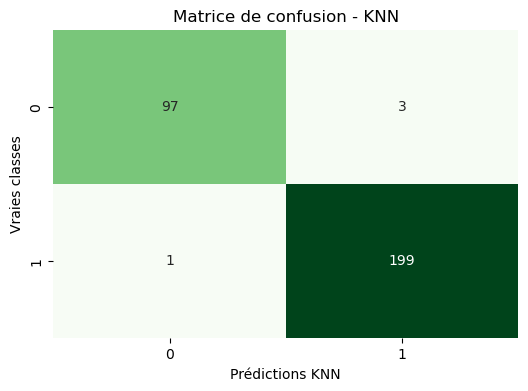

In [66]:
# Matrice de confusion
cm_knn = confusion_matrix(y_test, y_pred_knn)

# Affichage sous forme de heatmap
plt.figure(figsize=(6, 4))
sns.heatmap(cm_knn, annot=True, fmt="d", cmap="Greens", cbar=False)
plt.xlabel("Prédictions KNN")
plt.ylabel("Vraies classes")
plt.title("Matrice de confusion - KNN")
plt.show()

In [52]:
# Classification Report
report_knn = classification_report(y_test, y_pred_knn)
print("Rapport de classification - KNN :\n")
print(report_knn)

Rapport de classification - KNN :

              precision    recall  f1-score   support

           0       0.99      0.97      0.98       100
           1       0.99      0.99      0.99       200

    accuracy                           0.99       300
   macro avg       0.99      0.98      0.98       300
weighted avg       0.99      0.99      0.99       300



In [53]:
# Vérification des prédictions
results = pd.DataFrame({
    "is_guenuine": y_test,
    "Prédiction KNN": y_pred_knn,
    "Probabilité classe 0": y_pred_prob_knn[:, 0],
    "Probabilité classe 1": y_pred_prob_knn[:, 1]
})
print(results.head())

      is_guenuine  Prédiction KNN  Probabilité classe 0  Probabilité classe 1
803             1               1                   0.0                   1.0
1306            0               0                   1.0                   0.0
1263            0               0                   1.0                   0.0
38              1               1                   0.0                   1.0
257             1               1                   0.0                   1.0


<div style="background-color: RGB(0,150,150);" >
  <h2 style="margin: auto; padding: 10px; color:#fff; font-size:15px;">
    Modèle RANDOM FOREST
  </h2>
</div>

In [54]:
# Créer le modèle
rf_model = RandomForestClassifier(n_estimators=200,
    max_depth=None,
    min_samples_split=2,
    min_samples_leaf=1,
    max_features="sqrt",
    class_weight="balanced",
    random_state=42
)

In [55]:
# Réaliser l'entraînement du modèle
rf_model.fit(X_train, y_train)
y_pred_rf = rf_model.predict(X_test)

In [56]:
# Calculer l'accuracy du modèle
accuracy_rf = accuracy_score(y_test, y_pred_rf)
print("Précision du modèle Random Forest :", accuracy_rf)
print("Accuracy arrondie :", round(accuracy_rf, 2))

Précision du modèle Random Forest : 0.99
Accuracy arrondie : 0.99


In [57]:
# Calculer la probabilité
y_pred_prob_rf = rf_model.predict_proba(X_test)[:, 1]
print("\nProbabilités de la classe 1 (exemple sur 10 premières lignes) :")
print(y_pred_prob_rf[:10])


Probabilités de la classe 1 (exemple sur 10 premières lignes) :
[0.995 0.    0.    0.93  0.99  1.    0.995 1.    1.    0.99 ]


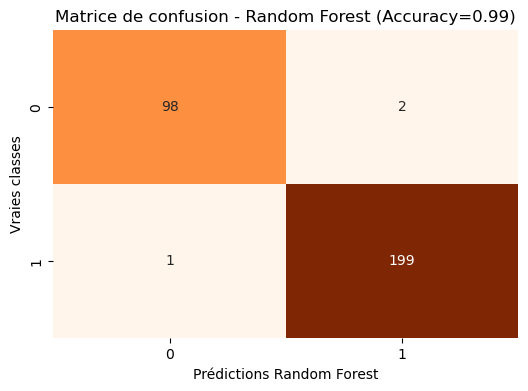

In [58]:
# Matrice de confusion
cm_rf = confusion_matrix(y_test, y_pred_rf)

plt.figure(figsize=(6, 4))
sns.heatmap(cm_rf, annot=True, fmt="d", cmap="Oranges", cbar=False)
plt.xlabel("Prédictions Random Forest")
plt.ylabel("Vraies classes")
plt.title(f"Matrice de confusion - Random Forest (Accuracy={round(accuracy_rf,2)})")
plt.show()

In [59]:
# Classification Report
print("\nRapport de classification - Random Forest :\n")
print(classification_report(y_test, y_pred_rf))


Rapport de classification - Random Forest :

              precision    recall  f1-score   support

           0       0.99      0.98      0.98       100
           1       0.99      0.99      0.99       200

    accuracy                           0.99       300
   macro avg       0.99      0.99      0.99       300
weighted avg       0.99      0.99      0.99       300



In [60]:
# Vérification des prédictions
results_rf = pd.DataFrame({
    "Vraie classe": y_test,
    "Prédiction RF": y_pred_rf,
    "Probabilité classe 1": y_pred_prob_rf
})

print("\nAperçu des prédictions :")
print(results_rf.head())


Aperçu des prédictions :
      Vraie classe  Prédiction RF  Probabilité classe 1
803              1              1                 0.995
1306             0              0                 0.000
1263             0              0                 0.000
38               1              1                 0.930
257              1              1                 0.990


<div style="background-color: RGB(0,150,150);" >

<h2 style="margin: auto; padding: 20px; color:#fff; ">Etape 5 - Enregistrer le modèle</h2>

</div>

In [61]:
# !pip install joblib

In [62]:
import joblib

In [64]:
# Enregistrer le modèle random forest
joblib.dump(logmodel, "modele_faux_billet_26_08_2025.sav")

['modele_faux_billet_26_08_2025.sav']

In [65]:
# Enregistrer la normalisation
norm_filename = 'normalisation_26_07_2025.sav'
joblib.dump(scaler, norm_filename)

['normalisation_26_07_2025.sav']